In [1]:
import pandas as pd

# Load the Excel file
file_path = "FAOSTAT_data.xlsx"  # Update this if the path is different
xls = pd.ExcelFile(file_path)

# Load the sheet (you can check sheet names with xls.sheet_names)
df = xls.parse(xls.sheet_names[0])

# Preview the data
print(df.head())


  Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code         Element Item Code (CPC)               Item  Year Code  \
0          5312  Area harvested            1371  Almonds, in shell       2019   
1          5412           Yield            1371  Almonds, in shell       2019   
2          5510      Production            1371  Almonds, in shell       2019   
3          5312  Area harvested            1371  Almonds, in shell       2020   
4          5412           Yield            1371  Almonds, in shell       2020   

   Year   Unit    Value Flag Flag Description Note

In [2]:
# Drop irrelevant columns
columns_to_drop = [
    'Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)',
    'Year Code', 'Flag', 'Flag Description', 'Note'
]
df_cleaned = df.drop(columns=columns_to_drop)

# Drop rows with missing 'Value'
df_cleaned = df_cleaned.dropna(subset=['Value'])

# Pivot to make 'Element' values into columns (Production, Yield, etc.)
df_pivot = df_cleaned.pivot_table(
    index=['Area', 'Item', 'Year', 'Unit'],
    columns='Element',
    values='Value'
).reset_index()


In [3]:
# Keep only rows that have at least one key metric
key_metrics = ['Production', 'Yield', 'Area harvested']
df_filtered = df_pivot.dropna(subset=key_metrics, how='all')

# Clean column names: lowercase, replace spaces with underscores
df_filtered.columns = df_filtered.columns.str.strip().str.lower().str.replace(' ', '_')

# View cleaned data
print(df_filtered.head())


Element         area               item  year   unit  area_harvested  laying  \
0        Afghanistan  Almonds, in shell  2019     ha         29203.0     NaN   
1        Afghanistan  Almonds, in shell  2019  kg/ha             NaN     NaN   
2        Afghanistan  Almonds, in shell  2019      t             NaN     NaN   
3        Afghanistan  Almonds, in shell  2020     ha         22134.0     NaN   
4        Afghanistan  Almonds, in shell  2020  kg/ha             NaN     NaN   

Element  milk_animals  producing_animals/slaughtered  production  stocks  \
0                 NaN                            NaN         NaN     NaN   
1                 NaN                            NaN         NaN     NaN   
2                 NaN                            NaN     38205.0     NaN   
3                 NaN                            NaN         NaN     NaN   
4                 NaN                            NaN         NaN     NaN   

Element   yield  yield/carcass_weight  
0           NaN       

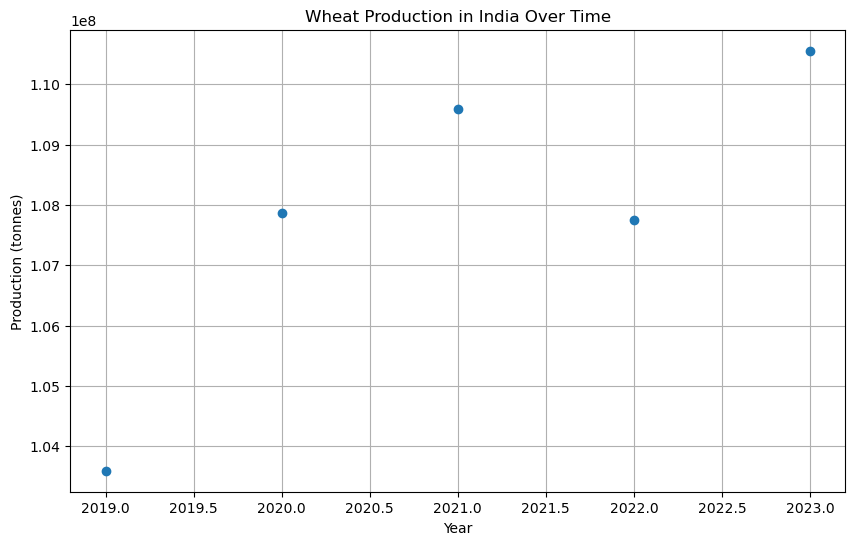

In [4]:
import matplotlib.pyplot as plt

# Filter for a specific item and country
subset = df_filtered[(df_filtered['area'] == 'India') & (df_filtered['item'] == 'Wheat')]

# Plot production over time
plt.figure(figsize=(10, 6))
plt.plot(subset['year'], subset['production'], marker='o', linestyle='-')
plt.title("Wheat Production in India Over Time")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows where 'production' is missing
df_model = df_filtered.dropna(subset=['production'])

# Fill missing predictors if needed (you could also drop them instead)
df_model = df_model.fillna(0)

# Features and target
X = df_model[['year', 'area_harvested', 'yield']]
y = df_model['production']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 130371038775264.06
R² Score: -3.0959111172235154e-05


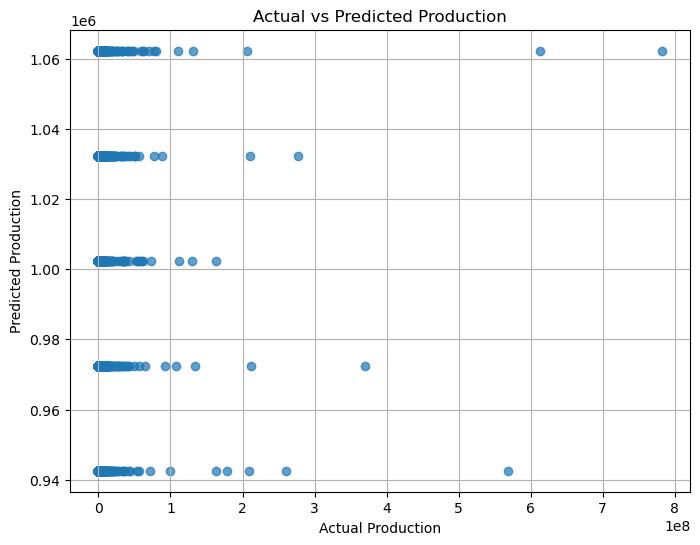

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Production")
plt.grid(True)
plt.show()


In [11]:
pip install scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df_filtered is your cleaned DataFrame
df_model = df_filtered.dropna(subset=['production'])
df_model = df_model.fillna(0)  # or df_model.dropna() if you'd rather drop rows with missing features

# Features and target
X = df_model[['year', 'area_harvested', 'yield']]
y = df_model['production']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Random Forest Performance:
Mean Squared Error: 130372311243287.52
R² Score: -4.071977143760286e-05

XGBoost Performance:
Mean Squared Error: 130371680572708.56
R² Score: -3.588211646543549e-05


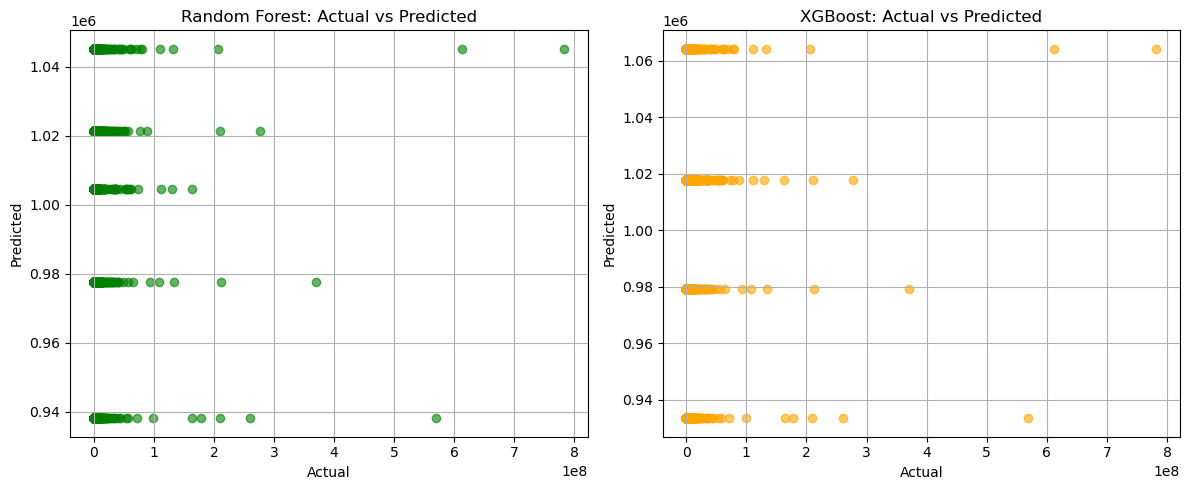

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Random Forest Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.6, color='green')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

# XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.6, color='orange')
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()


2025-04-24 13:36:18.225 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-24 13:36:19.223 
  command:

    streamlit run D:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-24 13:36:19.223 No runtime found, using MemoryCacheStorageManager
D:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


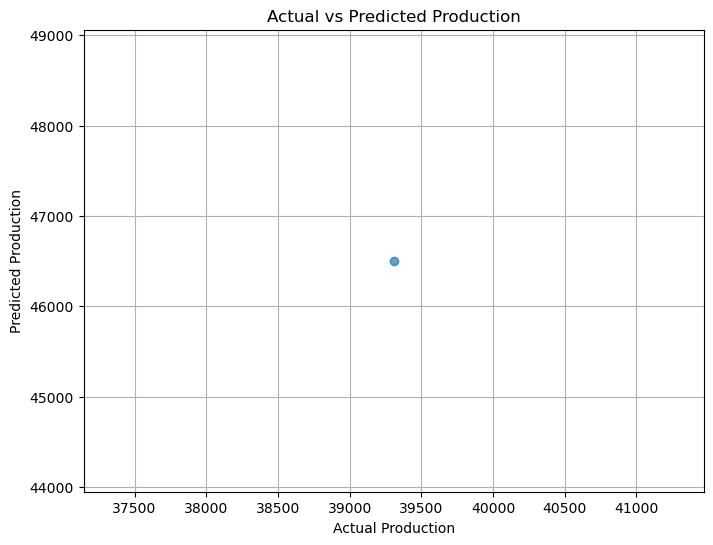

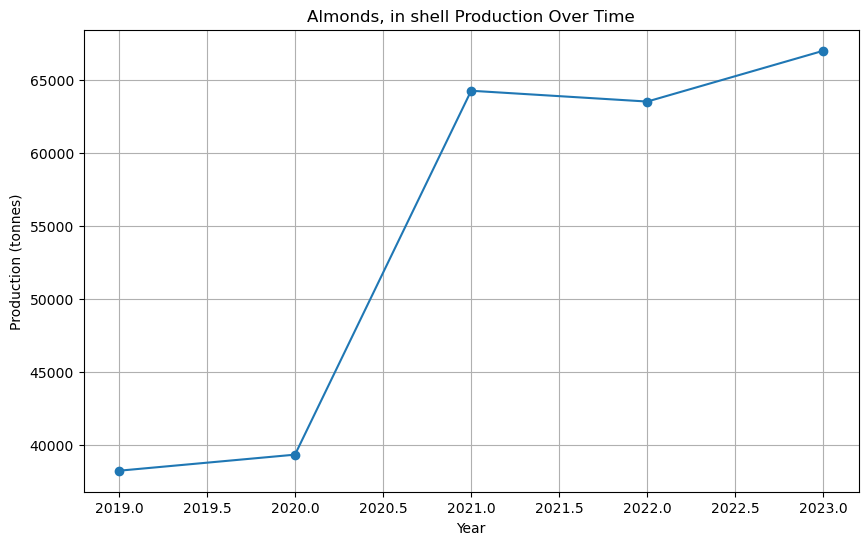

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load and preprocess the cleaned data
@st.cache_data
def load_data():
    # Load the Excel file
    df = pd.read_excel("FAOSTAT_data.xlsx", sheet_name=0)
    
    # Drop irrelevant columns
    columns_to_drop = [
        'Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)',
        'Year Code', 'Flag', 'Flag Description', 'Note'
    ]
    df = df.drop(columns=columns_to_drop)
    
    # Drop rows with missing 'Value'
    df = df.dropna(subset=['Value'])
    
    # Pivot to make 'Element' values into columns (Production, Yield, etc.)
    df_pivot = df.pivot_table(
        index=['Area', 'Item', 'Year', 'Unit'],
        columns='Element',
        values='Value'
    ).reset_index()
    
    # Clean column names
    df_pivot.columns = df_pivot.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # Filter rows with at least one key metric
    df_filtered = df_pivot.dropna(subset=['production', 'area_harvested', 'yield'], how='all')
    
    return df_filtered

# Load data
df = load_data()

# Sidebar filters
st.sidebar.title("Filters")
selected_country = st.sidebar.selectbox("Select Country", sorted(df['area'].unique()))
selected_crop = st.sidebar.selectbox("Select Crop", sorted(df[df['area'] == selected_country]['item'].unique()))
model_choice = st.sidebar.radio("Select Model", ['Random Forest', 'XGBoost'])

# Filtered data
filtered_df = df[(df['area'] == selected_country) & (df['item'] == selected_crop)]
filtered_df = filtered_df.dropna(subset=['production'])
filtered_df = filtered_df.fillna(0)  # Fill missing values with 0

# Main app
st.title("Crop Production Prediction App")

if filtered_df.empty:
    st.warning("No data available for this selection.")
else:
    # Features and target
    X = filtered_df[['year', 'area_harvested', 'yield']]
    y = filtered_df['production']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model selection
    if model_choice == 'Random Forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        model = XGBRegressor(n_estimators=100, random_state=42)
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Display metrics
    st.subheader(f"{model_choice} Performance on {selected_crop} in {selected_country}")
    st.write("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
    st.write("R² Score:", round(r2_score(y_test, y_pred), 2))
    
    # Plot actual vs predicted
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.set_xlabel("Actual Production")
    ax.set_ylabel("Predicted Production")
    ax.set_title("Actual vs Predicted Production")
    ax.grid(True)
    st.pyplot(fig)
    
    # Optional: Plot production over time
    st.subheader(f"{selected_crop} Production Over Time in {selected_country}")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(filtered_df['year'], filtered_df['production'], marker='o', linestyle='-')
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Production (tonnes)")
    ax2.set_title(f"{selected_crop} Production Over Time")
    ax2.grid(True)
    st.pyplot(fig2)